In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/human-vs-ai-generated-essays/balanced_ai_human_prompts.csv")
print(df.head())

                                                text  generated
0  Machine learning, a subset of artificial intel...          1
1  A decision tree, a prominent machine learning ...          1
2  Education, a cornerstone of societal progress,...          1
3  Computers, the backbone of modern technology, ...          1
4  Chess, a timeless game of strategy and intelle...          1


In [2]:
human_texts = df[df['generated'] == 0]['text']
ai_texts = df[df['generated'] == 1]['text']


In [3]:
human_texts.shape

(1375,)

In [4]:
ai_texts.shape

(1375,)

In [5]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 5000000

In [6]:
def preprocess(text, chunk_size=100000):
    tokens = []
    lemmas = []
    doc_list = []   # VERY IMPORTANT: new name

    for i in range(0, len(text), chunk_size):
        chunk = text[i:i + chunk_size]

        doc_obj = nlp(chunk)   # doc_obj is ALWAYS a Doc
        doc_list.append(doc_obj)

        for token in doc_obj:
            if token.is_alpha and not token.is_stop:
                tokens.append(token.text)
                lemmas.append(token.lemma_)

    return tokens, lemmas, doc_list

In [7]:
human_text = " ".join(human_texts.astype(str))
ai_text = " ".join(ai_texts.astype(str))

In [8]:
h_tokens, h_lemma, h_docs = preprocess(human_text)
a_tokens, a_lemma, a_docs = preprocess(ai_text)

In [9]:
def show_pos_ner(doc_obj, title):
    print(f"\n🔹 {title} POS Tags (sample):")

    count = 0
    for token in doc_obj:
        print(token.text, "→", token.pos_)
        count += 1
        if count == 20:
            break

    print(f"\n🔹 {title} Named Entities:")
    for ent in doc_obj.ents:
        print(ent.text, "→", ent.label_)

In [10]:
show_pos_ner(h_docs[0], "Human Text")
show_pos_ner(a_docs[0], "AI Text")


🔹 Human Text POS Tags (sample):
Cars → NOUN
. → PUNCT
Cars → NOUN
have → AUX
been → AUX
around → ADV
since → SCONJ
they → PRON
became → VERB
famous → ADJ
in → ADP
the → DET
1900s → NOUN
, → PUNCT
when → SCONJ
Henry → PROPN
Ford → PROPN
created → VERB
and → CCONJ
built → VERB

🔹 Human Text Named Entities:
the 1900s → DATE
Henry Ford → PERSON
first → ORDINAL
German → NORP
Elizabeth Rosenthal → PERSON
Shanghai → GPE
Chicago → GPE
12 percent → PERCENT
Europe → LOC
up to 50 percent → PERCENT
the United States → GPE
Paris → GPE
Robert Duffer → PERSON
Paris → GPE
days → DATE
Monday → DATE
22euro → CARDINAL
the following day → DATE
Paris → GPE
Bogota → GPE
Andrew Selsky → PERSON
millions → CARDINAL
Columbians → NORP
a carfree day → DATE
the third straight year → DATE
7 million → CARDINAL
days → DATE
Columbia → GPE
days → DATE
Columbia → ORG
America → GPE
Transportation → ORG
daily → DATE
Earth → LOC
Germany → GPE
Vauban → ORG
Vauban → PERSON
70% → PERCENT
Vauban → ORG
57% → PERCENT
Vauban → O

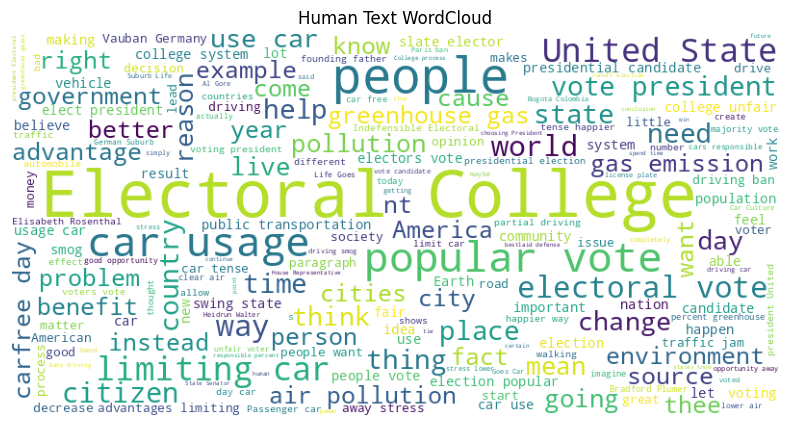

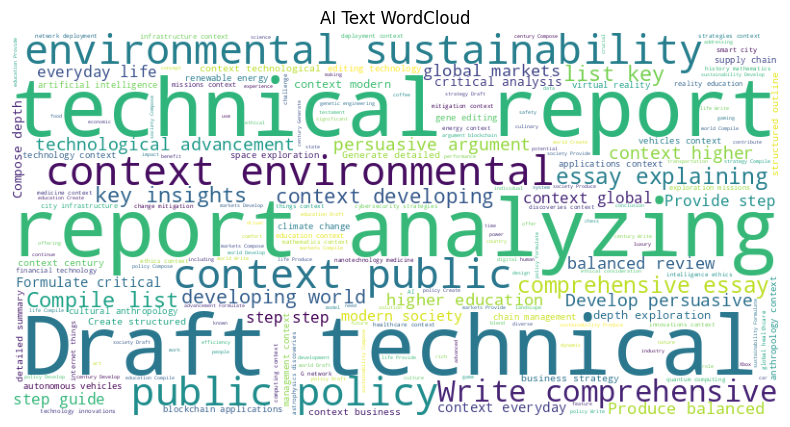

In [11]:
def generate_wordcloud(words, title):
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white"
    ).generate(" ".join(words))

    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(title)
    plt.show()

generate_wordcloud(h_tokens, "Human Text WordCloud")
generate_wordcloud(a_tokens, "AI Text WordCloud")